# Jupyter - Day 12 - Section 002
# Lecture 12
## Validation set and Cross-Validation




In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Train test splits for today 
from sklearn.model_selection import train_test_split


# 1. Validation set



The first thing we will do is try out the validation set approach. We've already used this some in class so this should be review.


## Validation set on toy data

First off, let's generate some toy data just to mess around. 

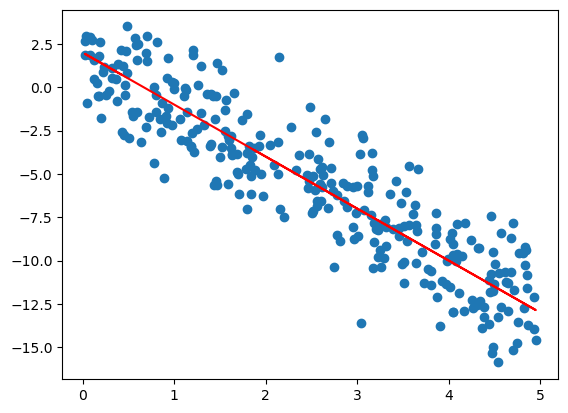

In [2]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m = -3, b = 2):
    return m*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

# reshaping to deal with cranky code later
X_toy = X_toy.reshape(-1,1)
y_toy = y_toy.reshape(-1,1)

plt.scatter(X_toy,y_toy)
plt.plot(X_toy,f(X_toy),c = 'red')

Ok, so now we have our fake data set up.  Extracting training and testing sets is as simple as the following single line. Note that I set the `random_state` variable which means that every time you run this, you (and your neighbor) will have the same train/test split.  

In [3]:
randomseed = 48824

X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, 
                                                    test_size=0.2, 
                                                    random_state=randomseed)

What this does is extracts two pairs of input/output variables $X$ and $y$.  The train we will use to train our models, and then we will test (or validate) them on the test data. 

One way to see what these sets are is to plot them, although usually we have much higher $p$ (a.k.a. way more input variables) so we can't really visualize like this normally. 

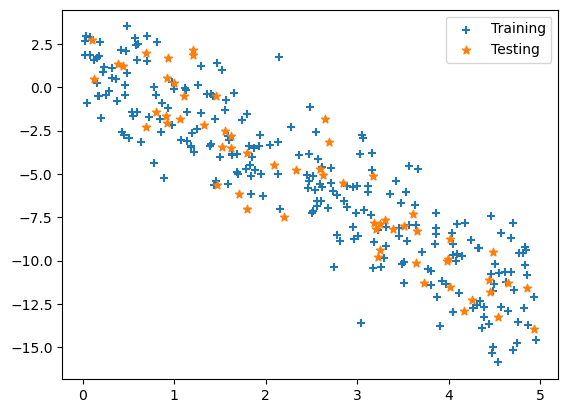

In [4]:
plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

&#9989; **<font color=red>Do this:</font>** Set up a linear regression model using `sklearn`, train it on the training set, and test it on the test set.  What is your mean squared error? 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2.9429982277593276

Now that we can see what happens in one case, let's try doing this many times.  
The code below changes our random seed. 

&#9989; **<font color=red>Do this:</font>** The `randomseed += 1` command below changes the seed every time you run the cell. Use this to generate a train/test split with a new seed and compute the MSE. 

- What happens to the MSE? 


In [6]:
# Running this changes the random seed to get a new split of the data
randomseed +=1

# Put your code here to generate a new train test split, run a new model, and compute the MSE
X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, 
                                                    test_size=0.2, 
                                                    random_state=randomseed)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

3.529281332144893


&#9989; **<font color=red>Do this:</font>** Below, create a loop, repeating what you did the in the last cell $k=30$ times. Keep track of the MSE in a list and draw a histogram of the results. What do you notice? If you want to see more pattern, set $k$ to be something larger like 100.

(array([2., 0., 3., 5., 2., 3., 5., 4., 2., 4.]),
 array([2.64975624, 2.89636343, 3.14297062, 3.38957781, 3.63618499,
        3.88279218, 4.12939937, 4.37600656, 4.62261375, 4.86922094,
        5.11582813]),
 <BarContainer object of 10 artists>)

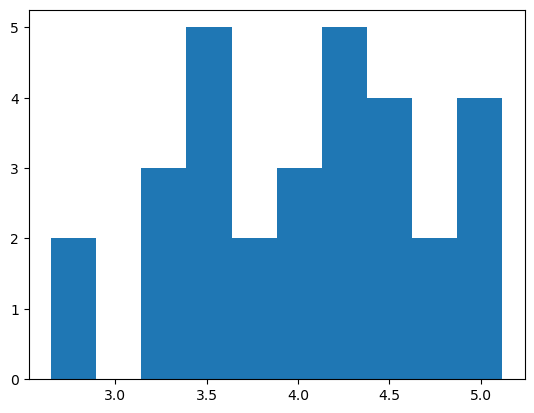

In [7]:
# Your code here
mse=[]
for i in range(30):
    randomseed+=1
    X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, 
                                                    test_size=0.2, 
                                                    random_state=randomseed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
plt.hist(mse)

(array([ 6., 14., 14., 19., 21., 11.,  8.,  4.,  1.,  2.]),
 array([2.73128127, 3.02665992, 3.32203858, 3.61741723, 3.91279588,
        4.20817454, 4.50355319, 4.79893185, 5.0943105 , 5.38968916,
        5.68506781]),
 <BarContainer object of 10 artists>)

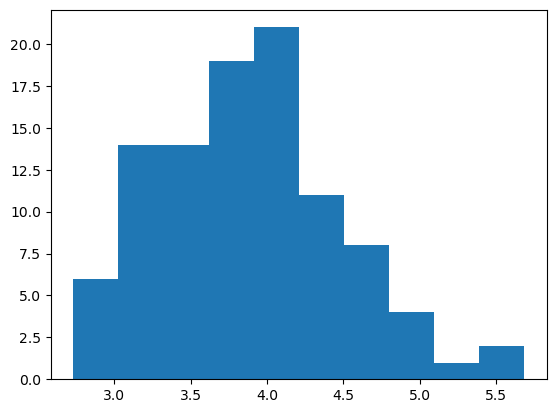

In [8]:
mse=[]
for i in range(100):
    randomseed+=1
    X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, 
                                                    test_size=0.2, 
                                                    random_state=randomseed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
plt.hist(mse)

(array([ 14.,  45., 148., 190., 218., 211., 106.,  46.,  14.,   8.]),
 array([2.22980055, 2.61164482, 2.99348909, 3.37533336, 3.75717763,
        4.1390219 , 4.52086617, 4.90271044, 5.28455471, 5.66639899,
        6.04824326]),
 <BarContainer object of 10 artists>)

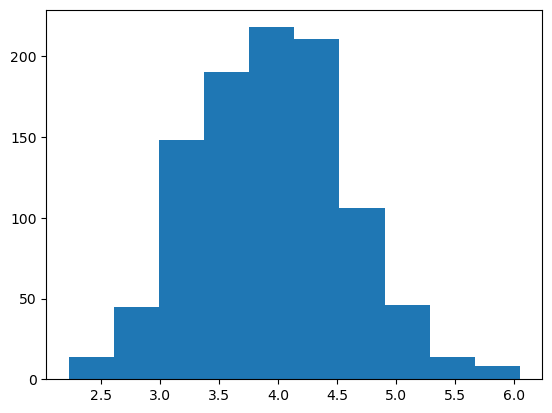

In [9]:
# Your code here
mse=[]
for i in range(1000):
    randomseed+=1
    X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, 
                                                    test_size=0.2, 
                                                    random_state=randomseed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
plt.hist(mse)


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 2. Leave One Out Cross Validation (LOOCV)

Luckily, `sklearn` has a simple built in procedure to extract your LOOCV splits for easily passing to your models. However, these work a bit differently than before. As always, the `sklearn` documentation and user guide is an excellent place to start. 

- [LOOCV Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)
- [LOOCV User guide](https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out)

Let's start with a very tiny version of our data set. 


Text(0.5, 1.0, 'Tiny Toy Data')

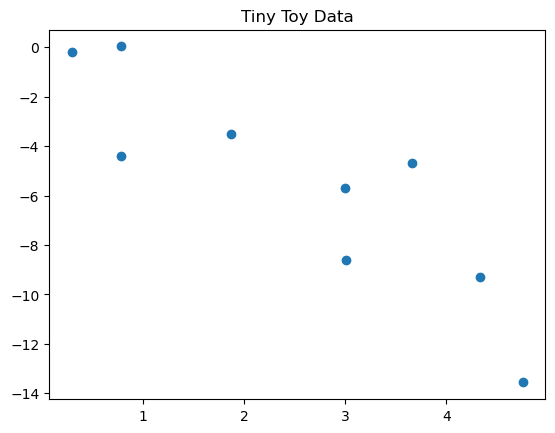

In [10]:
X_tiny_toy = X_toy[:9]
y_tiny_toy = y_toy[:9]

plt.scatter(X_tiny_toy,y_tiny_toy)
plt.title("Tiny Toy Data")


The following code gets us the LOOCV splits for this $n=10$ data set. Notice that trying to print `loo` doesn't give us much that's useful

In [11]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X_tiny_toy)


print(loo)

LeaveOneOut()


The power of the function shows up when we use it in a for loop:

In [12]:
for train_index, test_index in loo.split(X_tiny_toy):
    print("TRAIN:", train_index, "TEST:", test_index)
    print("\n")

TRAIN: [1 2 3 4 5 6 7 8] TEST: [0]


TRAIN: [0 2 3 4 5 6 7 8] TEST: [1]


TRAIN: [0 1 3 4 5 6 7 8] TEST: [2]


TRAIN: [0 1 2 4 5 6 7 8] TEST: [3]


TRAIN: [0 1 2 3 5 6 7 8] TEST: [4]


TRAIN: [0 1 2 3 4 6 7 8] TEST: [5]


TRAIN: [0 1 2 3 4 5 7 8] TEST: [6]


TRAIN: [0 1 2 3 4 5 6 8] TEST: [7]


TRAIN: [0 1 2 3 4 5 6 7] TEST: [8]




The major difference between the `LOO.split` output and the `train_test_split` from before is that `LOO.split` spits out indices while `train_test_split` gives the data points themselves. 

&#9989; **<font color=red>Do this:</font>** Finish the code below go get out the training and testing sets for each LOOCV split. 

In [13]:
for train_index, test_index in loo.split(X_tiny_toy):

    X_train = X_tiny_toy[train_index]
    X_test = X_tiny_toy[test_index]
    y_train = y_tiny_toy[train_index]
    y_test = y_tiny_toy[test_index]
    # Finish the code to get the X_test, y_train, and y_test

&#9989; **<font color=red>Do this:</font>** Now go back to using the full data set (`X_toy` instead of `X_tiny_toy`).  Use the leave one out splits to perform a linear regression on each one, return the mean squared error, and then average over all the values to get the LOOCV error estimation.

What do you notice about this error estimation vs. the validation set version above? 


In [14]:
loo = LeaveOneOut()
model = LinearRegression()
mse_list = []
for train_index, test_index in loo.split(X_toy):
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

np.mean(mse_list)

np.float64(3.936332087169852)

## The easier version

Ok I lied to you a bit. There's an even easier version of this whole LOO-CV thing. 

In [15]:
# This command does all your work for you
from sklearn.model_selection import cross_val_score


#define cross-validation method to use
cv = LeaveOneOut()

#build linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X_toy, y_toy, 
                         scoring='neg_mean_squared_error',
                         cv=cv)

#view mean absolute error
np.average(np.absolute(scores))



np.float64(3.936332087169852)

Check out this number. Remember LOO-CV has no randomness in it so you should have the same number here as you calculated previously. 



-----
### Congratulations, we're done!
Initially created by Dr. Liz Munch, adapted by Dr. Mengsen Zhang, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.